<center><h1> Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα </h1></center>
<center><h2>Δεύτερο Ερώτημα</h2></center><br>

Στο ερώτημα αυτό έχουμε ένα δείγμα από σήματα τα οποία λαβάνονται από αισθητήρες που παρακολουθούν την κατασκευή ημιαγωγών. Συγκεκριμένα έχουμε 590 χαρακτηριστικά, διαφορετικά σήματα αισθητήρων δηλαδή, και 1566 διαφορετικές δοκιμές. Τα Labels δίνονται σε ένα δεύτερο αρχείο και οι τιμές του είναι κατηγορικές, δηλαδή έχει -1 αν έγινε σωστά η κατασκευή και 1 αν είχαμε πρόβλημα. Στο πρόβλημα αυτό όπως αναφέρεται είχαμε 104 επιτυχιμένες δοκιμές. Μαζί με τα labels δίνεται και η ακριβής ώρα και μέρα που έγινε η δοκιμή. Αξίζει να σημειωθεί οτι στα δείγματα που έχουμε, όπως και στα περισσότερα πραγματικά δείγματα, λείπουν ορισμένες τιμές. Οι τιμες που λείπουν (κενή τιμή Null) σημειώνονται με την τιμή NaN στα δεδομένα εισόδου.

Αρχικά κατα τα γνωστά διαβάζουμε τα αρχεία με τα δεδομένα.

In [1]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_1a61d8e4b9784ac4b9ae5c6303ca5849(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_7766c6a00034dbf507b1f21d69eaf2b65b06a5ae','domain': {'id': '96c8e9860dc740b281dacc613be9e1ab'},
            'password': 'wQpop!A1o1-Eobz^'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_1= get_object_storage_file_with_credentials_1a61d8e4b9784ac4b9ae5c6303ca5849('exercise1', 'secom.data')


In [2]:
# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_2 = get_object_storage_file_with_credentials_1a61d8e4b9784ac4b9ae5c6303ca5849('exercise1', 'secom_labels.data')


In [3]:
data_df= pd.read_csv(data_1, sep=' ')
labels_df= pd.read_csv(data_2, sep= ' ')

Για να μπορέσουμε να επεξεργαστούμε τα δεδομένα αντικαθιστούμε τις ΝaN τιμές με το μέσο όρο των στοιχείων σε αυτή την στήλη. Επιλέξαμε να κάνουμε αυτό και οχι απλά να αφαιρέσουμε τις γραμμές που λείπουν στοιχεία για να μη χάσουμε πολύ χρήσιμη πληροφορία μιας και σε μεγάλο προσοστό των γραμμων είχαμε στοιχεία που έλειπαν. Επίσης, τόσο για την καλύτερη αίσθηση των δεδομένων όσο και για τον ευκολότερο χειρισμό τους μετασχηματίζουμε τα labels βάζοντας στις τιμές -1 το 1, το οποίο αυτό τωρα αναπαριστά την περίπτωση επιτυχίας και όπου 1 το 0 το οποίο αναπαριστά την περίπτωση αποτυχίας.

In [4]:
import numpy as np
data_missing= data_df.replace('NaN', np.NaN)

l_df= labels_df.ix[:,0]
l_df.shape
data_missing = data_df.values

mapping = {-1: 0}
l_p1 = l_df.replace(1, 0)
l_p2 = l_p1.replace(-1, 1)
# Τον πίνακα label τον αποθηκεύω με την μέθοδο flatten για να έχει μέγεθος (195,) και όχι (195,1)
labels = l_p2.values
print labels.shape
print data_missing.shape
print labels

(1566,)
(1566, 590)
[1 0 1 ..., 1 1 1]


Βλέπουμε οτι όντως δεν υπάρχουν -1 στον πίνακα με τα αποτελέσματα των δοκιμών.

In [5]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data_missing)
data= imp.transform(data_missing)
print data.shape

(1566, 590)


Ελέγχουμε αν τα στοιχεία του τελικού πίνακα με τα δεδομένα έχουν NaN τιμές. Βλέπουμε πως στα αρχικά δεδομένα είχαμε τίμες που έλειπαν ενώ στα τελικά όχι. Σε αυτήν την μορφή μπορούμε να επεξεργαστούμε τα δεδομένα των πινάκων.

In [6]:
print "Has NaN values: ", np.isnan(np.sum(data_missing)) 
print "Has NaN values: ", np.isnan(np.sum(data))

Has NaN values:  True
Has NaN values:  False


Επίσης μετράμε τον αριθμό pass/fail στα αποτελέσματα για να καταλάβουμε αν τα δεδομένα μας είναι ισορροπημένα ή οχι. Από τα αποτελέσματα βλέπουμε οτι τα δεδομένα μας δεν είναι ισορροπημένα με αποτέλεσμα ίσως να μην γίνεται καλύ εκπαίδευση των ταξινομητών. Η πραγματική αξιολόγηση για το αν χρειάζεται να ισορροπηθούν τα train δείγματα θα γίνει αργότερα.

In [7]:
frequencies= np.bincount(labels)
print frequencies

[ 104 1462]


Από το παραπάνω βλέπουμε οτι έχουμε κάνει σωστά την μετατροπή, μιας και από τα στοιχεία του προβλήματος γνωρίζαμε οτι είχαμε 104 αποτυχιμένες δοκιμές.

Ορίζουμε τις συναρτήσεις που είχαμε από πριν για να κάνουμε πιο εύκολη την διαδικασία οπτικοποίησης και σύγκρισης των αποτελεσμάτων.

In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
def graph_bar(statistics, x_labels):
    # data to plot
    n_groups = len(x_labels)
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
    F1_weighted= statistics[0::2]
    F1_macro= statistics[1::2]

    rects1 = plt.bar(index, F1_weighted, bar_width,
                     alpha=opacity,
                     color='b',
                     label='F1 Weighted')

    rects2 = plt.bar(index + bar_width, F1_macro, bar_width,
                     alpha=opacity,
                     color='g',
                     label='F1 Macro')

    plt.xlabel('Classifier')
    plt.ylabel('Scores')
    plt.title('Scores by classifier')
    plt.xticks(index + bar_width, x_labels)
    plt.legend(loc='best')

    # Tell matplotlib to interpret the x-axis values as dates
    # Make space for and rotate the x-axis tick labels
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

def report(test_labels, preds, forwhich):
    print classification_report(test_labels, preds, target_names = ['1','0'])
    print "Confusion matrix for {}:".format(forwhich)
    print "[[0  1]]"
    print confusion_matrix(test_labels, preds), "\n"
    (w1,w2,w3,w4) = precision_recall_fscore_support(test_labels, preds, average='weighted')
    print "F1 weighted average: %f \n" % w3
    (m1,m2,m3,m4) = precision_recall_fscore_support(test_labels, preds, average='macro')
    print "F1 macro average: %f \n" % m3
    return (w3,m3);

Χωρίζουμε τα δείγματά μας σε train και σε test έτσι ώστε το δεδομένα της δοκιμής να είναι το 30% των αρχικών. Παράλληλα χωρίζουμε και τα αποτελέσματα των δοκιμών.

In [10]:
from sklearn.model_selection import train_test_split

# Χωρίζουμε τα δεδομένα σε train και σε test
train, test, train_labels, test_labels = train_test_split(data, labels, test_size=0.3)
print train.shape  
print test.shape

(1096, 590)
(470, 590)


In [11]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
# Αρχικοποιούμε ένα κένο λεξικό
accuracy= {}

# με τη μέθοδο fit "εκπαιδεύουμε" κάθε έναν από τους ταξινομητές στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
# Κανουμε την εκπαίδευση για κάθε ταξινομητή και τα αποτελέσματα αυτών τα βάζουμε μάζι με ένα όνομα στο dictionary που κατασκευάσαμε 
# Εκπαίδευση uniform ταξινομητή
model = dc_uniform.fit(train, train_labels)
# Βάζουμε το ποσοσοστό της πιστότητας στο λεξικό
accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
predicts = dc_uniform.predict(test)
(uw, um) = report(test_labels,predicts,'Most Frequent Label')
    
# Εκπαίδευση constant ταξινομητή με constant = 0
model = dc_constant_0.fit(train, train_labels)
accuracy['constant: 0'] = dc_constant_0.score(test, test_labels)
predicts = dc_constant_0.predict(test)
(c0w, c0m) = report(test_labels,predicts,'Constant 0')
# Εκπαίδευση constant ταξινομητή με constant = 1
model = dc_constant_1.fit(train, train_labels)
accuracy['constant: 1'] = dc_constant_1.score(test, test_labels)
predicts = dc_constant_1.predict(test)
(c1w, c1m) = report(test_labels,predicts,'Constant 1')
    
# Εκπαίδευση most-frequent ταξινομητή 
model = dc_most_frequent.fit(train, train_labels)
accuracy['dc_most_frequent'] = dc_most_frequent.score(test, test_labels)
predicts = dc_most_frequent.predict(test)
(mfw, mfm) = report(test_labels,predicts,'Most frequent')
# Εκπαίδευση stratified ταξινομητή 
model = dc_stratified.fit(train, train_labels)
accuracy['stratified'] = dc_stratified.score(test, test_labels)
predicts = dc_stratified.predict(test)
(sw, sm) = report(test_labels,predicts,'Stratified')
print "Classification Accuracy on Parkinson Data with 20% test set:"
    
for key, value in sorted(accuracy.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)

DUMMIES_report= (uw, um, c0w, c0m, c1w, c1m, mfw, mfm, sw, sm)

             precision    recall  f1-score   support

          1       0.07      0.50      0.12        32
          0       0.93      0.49      0.64       438

avg / total       0.87      0.49      0.61       470

Confusion matrix for Most Frequent Label:
[[0  1]]
[[ 16  16]
 [222 216]] 

F1 weighted average: 0.608946 

F1 macro average: 0.381647 

             precision    recall  f1-score   support

          1       0.07      1.00      0.13        32
          0       0.00      0.00      0.00       438

avg / total       0.00      0.07      0.01       470

Confusion matrix for Constant 0:
[[0  1]]
[[ 32   0]
 [438   0]] 

F1 weighted average: 0.008680 

F1 macro average: 0.063745 

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        32
          0       0.93      1.00      0.96       438

avg / total       0.87      0.93      0.90       470

Confusion matrix for Constant 1:
[[0  1]]
[[  0  32]
 [  0 438]] 

F1 weighted average: 0.

/gpfs/fs01/user/sa71-dc88b9d39accf5-024122dacd14/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Τα αποτελέσμτα των Dummies και ο σχολιασμός τους δεν διαφέρουν πολύ από το προηγούμενο ερώτημα. Επειδή το ποσοστό των επιτυχιμένων προσπαθειών είναι πολύ μεγαλύτερο από αυτών που είχαν πρόβλήμα ο constant 0 έχει πολύ μικρό ποσοστό επιτυχίας ενώ ο constant 1 πολύ μεγάλο, όπως και οι υπόλοιποι. Συγκεκριμένα ο contstant 1 έχει ποσοστό επιτυχίας 88% όπως και ο Most Frequent και ο stratified έχει 86%. Παρόλο τα υψηλά ποσοστά τους σε κάμια περίπτωση δεν αρκούν αυτοί οι ταξινομητές γιατί όπως αναφέραμε και πριν η ειδική μορφή του dataset τους δίνει αυτές τις τιμές και όχι η πραγματική ικανότητά τους να ταξινομήσουν τα δεδομένα.

Στο σημείο αυτό θα κατασκευάσουμε έναν knn Classifier ο οποίος χρησιμοποιεί εναν αριθμό απο τις πιο κοντινές αποστάσεις από τα σημεία που γνωρίζει (από train set) για να ταξινομήσει τα δεδομένα. Τον ταξινομητή αυτόν τον κατασκευάζουμε με τις default τιμές του, δηλαδή ο αριθμός των κοντινότερων γειτόνων που εξετάζει κάθε φορά είναι το default=5.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(train, train_labels)
pred = knn.predict(test)
KNN_report=report(test_labels, pred, 'knn')

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        32
          0       0.93      1.00      0.96       438

avg / total       0.87      0.93      0.90       470

Confusion matrix for knn:
[[0  1]]
[[  0  32]
 [  1 437]] 

F1 weighted average: 0.898008 

F1 macro average: 0.481808 



Βλέπουμε οτι ο ταξηνομητής αυτός είχε αρκετά καλό σκορ φτάνοντας το f1 weighted= 88%. Από τον πίνακα σύγχυσης βλέπουμε ότι δεν κατάφερε να βρει καμία αποτυχημένη προσπάθεια ενώ για ένα μόνο δεδομένο έβαλε οτι η δοκιμή ήταν αποτυχημένη ενώ στην πραγματικότητα έκανε λάθος.

Στη συνέχεια κατασκευάζουμε έναν Gaussian Naive Bayes Classification με τις default τιμές.

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
preds= gnb.predict(test)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifie
prds= gnb.score(test, test_labels)
GNB_report=report (test_labels, preds, 'gnb')

             precision    recall  f1-score   support

          1       0.07      0.88      0.13        32
          0       0.95      0.17      0.29       438

avg / total       0.89      0.22      0.28       470

Confusion matrix for gnb:
[[0  1]]
[[ 28   4]
 [363  75]] 

F1 weighted average: 0.279395 

F1 macro average: 0.211262 



Από τις παραπάνω τιμές παρατηρούμε οτι έχουμε πολύ μικρό ποσοστό επιτυχίας για τον GNB classificator μιας και ο F1 weighted είναι μόνο 23%

Τέλος κατασκευάζουμε έναν mlp πάλι με τις default τιμές του και βλέπουμε τις αποδόσεις του.

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Κατασκευάζουμε ένα MLP με τις defualt τιμές παραμάτρων
clf = MLPClassifier()
clf.fit(train, train_labels)
preds = clf.predict(test)
MLP_report = report(test_labels, preds, 'MLP Default')

             precision    recall  f1-score   support

          1       0.10      0.16      0.12        32
          0       0.94      0.90      0.92       438

avg / total       0.88      0.85      0.86       470

Confusion matrix for MLP Default:
[[0  1]]
[[  5  27]
 [ 43 395]] 

F1 weighted average: 0.864572 

F1 macro average: 0.521802 



To default MLP με τα αρχικά δεδομένα έχει F1 weighted περίπου στο 85%. Παρακάτω παρουσιάζεται μια γραφική αναπαράσταση των αποτελεσμάτων για όλους τους classificators.

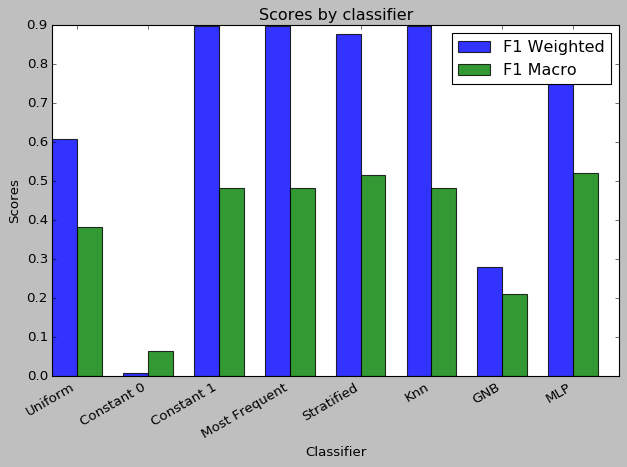

In [15]:
reports=DUMMIES_report + KNN_report + GNB_report + MLP_report
x_labels= ['Uniform','Constant 0', 'Constant 1', 'Most Frequent', 'Stratified','Knn','GNB', 'MLP']
graph_bar(reports, x_labels)

<center><h2>Bελτιστοποιήση ταξινομητών</h2></center><br>

Στην συνέχεια θα βρούμε την βελτιστη αρχιτεκτονική καθώς και τις βέλτιστες τιμές των υπερπαραμέτρων των ταξινομητών.

<center><h3> KNN Classificator</h3></center>
Ξεκινάμε από τον **KNN Classificator**.

In [16]:
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) 
pipe = Pipeline(steps=[('selector', selector),('scaler', scaler),('pca', pca), ('kNN', clf)], memory = 'tmp')

             precision    recall  f1-score   support

          1       0.67      0.06      0.11        32
          0       0.94      1.00      0.97       438

avg / total       0.92      0.93      0.91       470

Confusion matrix for Pipe KNN:
[[0  1]]
[[  2  30]
 [  1 437]] 

F1 weighted average: 0.907774 

F1 macro average: 0.540016 

(0.89800839803889365, 0.48180815876515987)
(0.90777410200003361, 0.54001578531965277)


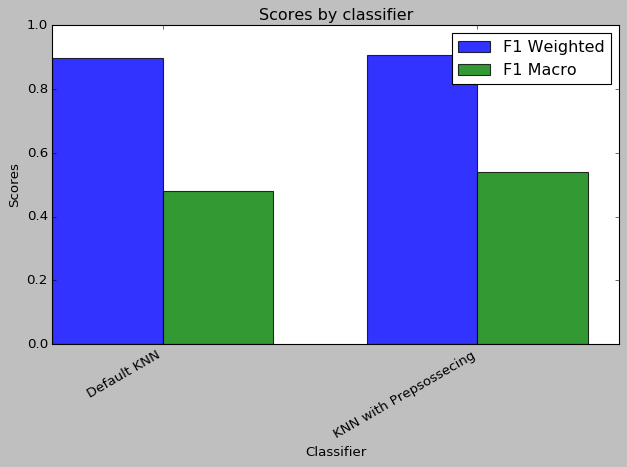

In [17]:
pipe.fit(train,train_labels)
preds = pipe.predict(test)
KNN_pipe_report= report(test_labels, preds,'Pipe KNN')
print KNN_report
print KNN_pipe_report
KNN_reports= KNN_report + KNN_pipe_report
x_labels= ['Default KNN', 'KNN with Prepsossecing']
graph_bar(KNN_reports, x_labels)

Καθώς προσπαθούσαμε να βρούμε την βέλτιστη αρχιτεκτονική για την προεπεξεργασία των δεδομένων παρατηρήσαμε ότι το σκόρ δεν ανέβαινε ή αυξανόταν ελάχιστα. Κατά κύριο λόγο η όποια προεπεξεργασία έτεινε να αφήνει άθικτο ή ακόμη και να μειώνε την απόδοση του KNN ταξινομητη. Ιδιαίτερα επηρεαζόταν από τον OverSampler τον οποίο όταν τον προσθέταμε χειροτέρευε πολύ τα αποτελέσματα. Η αρχιτεκτονική που αφήσαμε δείχνει ότι αυξάνει έστω και ελάχιστα την απόδοση του ταξινομητή. Υπενθυμίζουμε οτι ο ΚΝΝ έχει τις default τιμές και δεν έχουμε κάνει κάποιο Optimazation σε αυτόν. Απαραίτητο σε αυτό ήταν το στάδιο της scaler ώστε να μην μπορούν ακραίες τιμές να επηρεάζουν το αποτέλεσμα.

Στην συνέχεια θα κάνουμε **grid Search** σε αυτόν, με σκοπό να βρούμε τις βέλτιστες υπερπαραμέτρους του συστήματος. Θα κρατήσουμε την παραπάνω αρχιτεκτονική που μας έβρισκε καλά αποτελέσματα και θα ορίσουμε τις πιθανές τιμές που θα ψάξουμε. Αρχικά για τον knn έχουμε τρείς υπερπαράμετρους: τον αριθμό των γειτόνων (μονός αριθμός), τα metrics και τα weights. Επίσης δοκιμάζουμε και ορισμένες τιμές για το κατώφλι και τον αριθμό των συνιστωσών του PCA.

Αφου βρούμε τις βέλτιστες τιμές θα κάνουμε Predict το test δείγμα και θα συγκρίνουμε τα αποτελέσματα των ταξινομητών.

In [18]:
from sklearn.model_selection import GridSearchCV
vthreshold = [0, 0.01, 0.02]
n_components = [8, 20, 25, 30, 35]
k = [1, 5, 7, 9, 13, 21]
weights= ['uniform', 'distance']
metrics= ['euclidean','minkowski']

In [21]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,kNN__weights=weights,kNN__metric=metrics, kNN__n_neighbors=k), scoring='f1_macro', n_jobs=1)

In [22]:
import time
time1= time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print "Took: %s sec" %(time.time()- time1)

/gpfs/fs01/user/sa71-dc88b9d39accf5-024122dacd14/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Took: 419.215070963 sec


Εκτυπώνουμε τις βέλτιστες παραμέτρους που βρήκε το Grid Search που κάνεμε.

In [23]:
print estimator.best_estimator_

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.02)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform'))])


             precision    recall  f1-score   support

          1       0.00      0.00      0.00        32
          0       0.93      1.00      0.96       438

avg / total       0.87      0.93      0.90       470

Confusion matrix for knn:
[[0  1]]
[[  0  32]
 [  1 437]] 

F1 weighted average: 0.898008 

F1 macro average: 0.481808 

(0.89800839803889365, 0.48180815876515987)
(0.90777410200003361, 0.54001578531965277)
(0.89800839803889365, 0.48180815876515987)


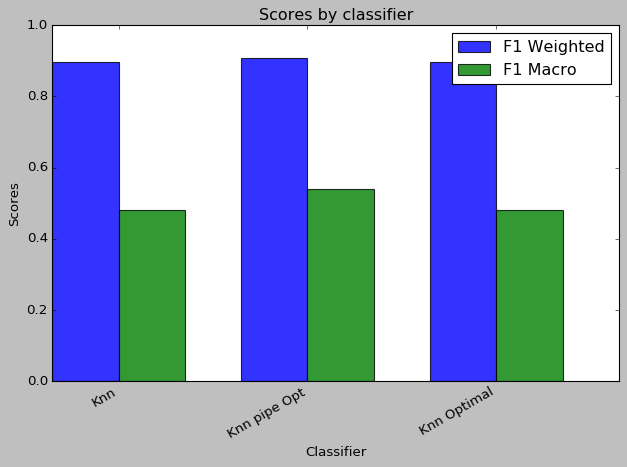

In [24]:
preds = estimator.predict(test)
KNN_report_opt=report(test_labels, pred, 'knn')
x_labels= ['Knn', 'Knn pipe Opt', 'Knn Optimal']
KNN_last_report= KNN_report +KNN_pipe_report + KNN_report_opt
print KNN_report
print KNN_pipe_report
print KNN_report_opt
graph_bar(KNN_last_report, x_labels)

Το παραπάνω grid search που τρέξαμε είχε ως μετρική την F1_macro. Οπότε τρέχουμε ξανά το grid Search με την μετρική για **f1_ weighted** και εμφανίζουμε πάλι τις διαφορές σε σχέση με τα αρχικά score που είχαμε

In [27]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,kNN__weights=weights,kNN__metric=metrics, kNN__n_neighbors=k), scoring='f1_weighted', n_jobs=-1)

In [28]:
time1= time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print "Took: %s sec" %(time.time()- time1)

Took: 64.8321909904 sec


Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform'))])
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        32
          0       0.93      1.00      0.96       438

avg / total       0.87      0.93      0.90       470

Confusion matrix for knn:
[[0  1]]
[[  0  32]
 [  1 437]] 

F1 weighted average: 0.898008 

F1 macro average: 0.481808 

(0.89800839803889365, 0.48180815876515987)
(0.90777410200003361, 0.54001578531965277)
(0.89800839803889365, 0.48180815876515987)


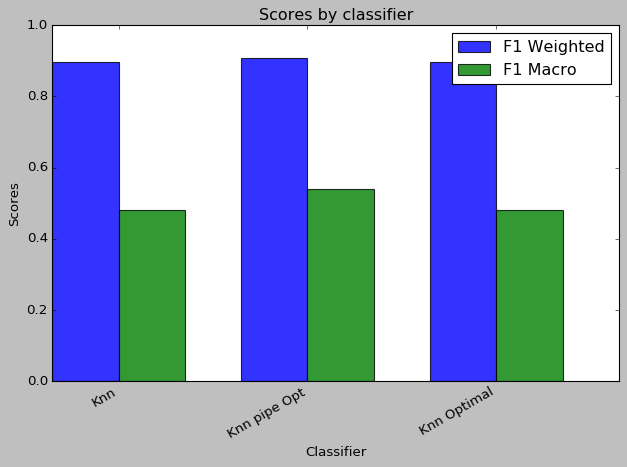

In [29]:
print estimator.best_estimator_
preds = estimator.predict(test)
KNN_report_opt=report(test_labels, pred, 'knn')
x_labels= ['Knn', 'Knn pipe Opt', 'Knn Optimal']
KNN_last_report= KNN_report +KNN_pipe_report + KNN_report_opt
print KNN_report
print KNN_pipe_report
print KNN_report_opt
graph_bar(KNN_last_report, x_labels)

Βλέπουμε ότι οι Optimal τιμές με τις default δεν έφεραν ιδιαίτερη αλλαγή στο αποτέλεσμα. Την πιο σημαντική αλλαγή την έφερε η σχεδίαση της αρχιτεκτονικής του συστήματος.Αυτό μπορεί αν οφείλεται στο γεγονός οτι για λόγους γρήγορης εκτέλεσης δεν εχούμε βάλει πολλές παραμέτρους για έλεγχο. Αν θέλαμε πιο ακριβή αποτελέσματα θα μπορούσαμε να βάλουμε. Εμείς έχουμε τρέξει για διάφορες τιμές το πρόγραμμα αλλά έχουμε δει οτι οι διαφορές είναι αρκετά μικρές.

Για την επιλογή των n_conpoments της τεχνικής PCA εκτελέσαμε μια φόρα χειροκίνητα και είδαμε από το διάγραμμα ότι είχαμε το 99% της πληροφορίας με μόλις τις πρώτες 20 στήλες και γι αυτό επιλέξαμε χαρακτηριστικά σε αυτό περίπου το πεδιο. Ειδικά στο διάγραμμα φαίνεται ξεκάθαρα το ποσσοτό της πληροφορίας που δεν χρειάζεται. Παρακάτω παρουσιάζεται ο κώδικας που το κάνει αυτό μαζί με τα αποτελέσματα που μας έβγαλε.

[ 0.57767937  0.83206094  0.91850657  0.94299758  0.95865956  0.96625239
  0.97096532  0.97421921  0.97697478  0.97935795  0.98150421  0.98338477
  0.98502221  0.98631319  0.98753447  0.98871734  0.98986659  0.99081847
  0.9917072   0.99259046  0.99334445  0.9940598   0.99474604  0.99531135
  0.99587153  0.99638339  0.99686411  0.99733026  0.99771359  0.99807404
  0.99838419  0.99861411  0.99877712  0.99889847  0.9990158   0.99912726
  0.99921328  0.99929512  0.99937413  0.99942973  0.99947747  0.99952439
  0.9995698   0.99960808  0.99963913  0.99966787  0.99969341  0.99971697
  0.99973846  0.99975975  0.99977609  0.99979189  0.99980684  0.99981988
  0.99983262  0.99984519  0.99985686  0.99986799  0.99987845  0.99988793
  0.99989692  0.99990553  0.99991315  0.99992015  0.99992661  0.99993258
  0.99993769  0.99994272  0.99994741  0.99995132  0.99995503  0.99995855
  0.99996166  0.99996441  0.99996686  0.99996926  0.99997138  0.99997344
  0.99997528  0.99997688  0.99997844  0.99997986  0

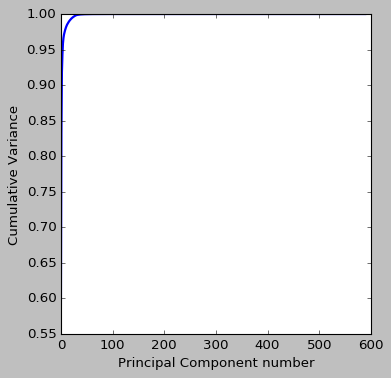

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
trainPCA = pca.fit_transform(train)
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print cum_evar
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

<center><h2>GNB Classification</center></h2>

Στη συνέχεια θα βελτιστοποιήσουμε την αρχιτεκτονική του **GNB Classification**.

Θα βρούμε την βέλτιστη αρχιτεκτονική για την προεπεξεργασία των δεδομένων.

In [ ]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους για Gaussian Bayes
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('sampler', ros),('scaler', scaler),('selector', selector), ('pca', pca),('gnb', clf)], memory = 'tmp')

In [ ]:
pipe.fit(train,train_labels)
preds = pipe.predict(test)
GNB_pipe_report= report(test_labels, preds,'GNB')
print GNB_report
print GNB_pipe_report
GNB_reports= GNB_report + GNB_pipe_report
x_labels= ['Default GNB', 'GNB with Prepsossecing']
graph_bar(GNB_reports, x_labels)

Όπως παρατηρούμε από το παραπάνω διάγραμμα η προεπεξεργασία των δεδομένων επιφέρει θεαματική αλλαγή στο σκόρ του GNB ταξινομητή. Επίσης παρατηρήσαμε κατά τη διάρκεια αναζήτησης της βέλτιστης αρχιτεκτονικής προεπεξεργασίας οτι υπήρχαν μεγάλες διαφορές στα αποτελέσματα από τα παραπάνω. Για παράδειγμα αν σβήναμε τον sampler είχαμε όπως ήταν λογικό μεγάλη μείωση της απόδοσης του ταξινομητή αυτού όπως και αν σβήναμε τον selector. Για την εύρεση της βέλτιστης αρχιτεκτονικής δοκιμάστηκαν αρκετές διαφορετικές μέθοδοι και αυτή που έδωσε τα καλύτερα αποτελέσματα ήταν η παραπάνω. Τέλος παρατηρήσαμε ότι τη μεγαλύτερη αύξηση στην απόδοση την προσφέρει η τεχνική του PCA μιας και χωρίς καμία μέθοδο προεπεξεργασίας τα αποτελέσματα δεν αλλάζουν σχεδόν καθόλου. Άρα το πλέον σημαντικό βήμα το οποίο πετυχαίνει την αύξηση της απόδοσης του ταξινομητή **GNB** είναι το βήμα της εξαγωγής χαρακτηριστικών **PCA**.

Στη συνέχεια θα ψάξουμε την βέλτιστη τιμή των υπερπαραμέτρων αυτής της αρχιτεκτονικής. Συγκεκριμένα, ο GNB δεν έχει κάποιες υπερπαραμέτρους (σύμφωνα με την εκφώνηση) και γι αυτό θα κάνουμε grid Search μόνο για τις τιμές των παραμέτρων της προεπεξεργασίας δηλαδή για το κατώφλι και τα χαρακτηριστικά της PCA.

In [ ]:

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), scoring='f1_macro', n_jobs=-1)

time1= time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print "Took: %s sec" %(time.time()- time1)

Εκτυπώνουμε τις βέλτιστες τιμές των υπερπαραμέτρων που βρήκαμε μέσω του **grid Search**.

In [34]:
print estimator.best_estimator_

Pipeline(memory='tmp',
     steps=[('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None))])


Συγκρίνουμε τα αποτελέσματα με αυτά που είχαμε πριν για να δούμε τη διαφορά που είχαν οι υπερπαράμετροι από τους default.

In [ ]:
preds = estimator.predict(test)
GNB_report_opt=report(test_labels, pred, 'GNB')
x_labels= ['GNB', 'GNB pipe Default', 'GNB Optimal']
GNB_last_report= KNN_report +GNB_pipe_report + GNB_report_opt
print GNB_report
print GNB_pipe_report
print GNB_report_opt
graph_bar(GNB_last_report, x_labels)

Κάνουμε grid search και για scoring **f1 weighted**.

In [36]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), scoring='f1_weighted', n_jobs=-1)

time1= time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print "Took: %s sec" %(time.time()- time1)

Took: 2.92824912071 sec


In [37]:
print estimator.best_estimator_

Pipeline(memory='tmp',
     steps=[('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None))])


In [ ]:
preds = estimator.predict(test)
GNB_report_opt=report(test_labels, pred, 'GNB')
x_labels= ['GNB', 'GNB pipe Default', 'GNB Optimal']
GNB_last_report= GNB_report +GNB_pipe_report + GNB_report_opt
print GNB_report
print GNB_pipe_report
print GNB_report_opt
graph_bar(GNB_last_report, x_labels)

Σε αυτό το grid search βρήκαμε μόνο τις υπερπαρεμέτρους της προεπεξεργασίας. Αξίζει να σημειωθεί οτι τα αρχικά με τα τελικά σκορ διαφέρουν αισθητά (έχουν αυξηθεί κατά **60%** περίπου)!

<center><h2> MLP</center></h2>

Τέλος θα βελτιστοποιήσουμε το **MLP**.

In [39]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους για Gaussian Bayes
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = MLPClassifier()
pipe = Pipeline(steps=[('scaler', scaler),('sampler', ros),('selector', selector), ('pca', pca),('MLP', clf)], memory = 'tmp')

/gpfs/fs01/user/sa71-dc88b9d39accf5-024122dacd14/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


             precision    recall  f1-score   support

          1       0.17      0.19      0.18        32
          0       0.94      0.93      0.94       438

avg / total       0.89      0.88      0.88       470

Confusion matrix for Pipe MLP:
[[0  1]]
[[  6  26]
 [ 30 408]] 

F1 weighted average: 0.884082 

F1 macro average: 0.556125 

(0.86457199406234531, 0.52180232558139528)
(0.88408216692884445, 0.55612520237452778)


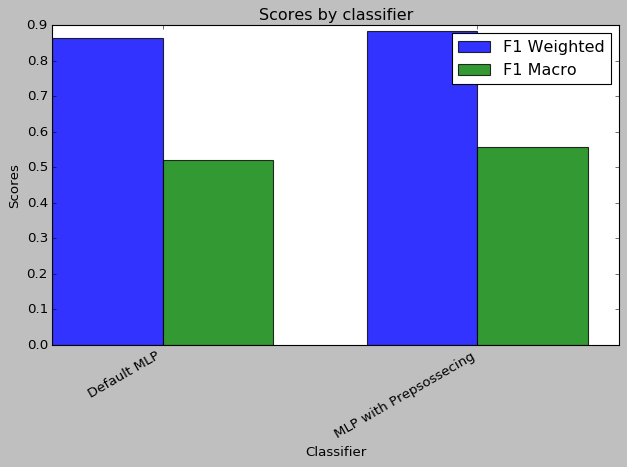

In [40]:
pipe.fit(train,train_labels)
preds = pipe.predict(test)
MLP_pipe_report= report(test_labels, preds,'Pipe MLP')
print MLP_report
print MLP_pipe_report
MLP_reports= MLP_report + MLP_pipe_report
x_labels= ['Default MLP', 'MLP with Prepsossecing']
graph_bar(MLP_reports, x_labels)

Βλέπουμε από τα παραπάνω ότι η προεπεξεργασία των δεδομένων είχε αλλαγή στο αποτέλεσμα του MLP με τις default τιμές. Αξίζει να σημειωθεί οτι δοκιμάστηκαν και άλλέες αρχιτεκτονικές προεπεξεργασίας αλλά αυτή ήταν η καλύτερη. Επίσης χρησιμοποιήθηκε και ο UnderSmpler άλλα όπως ήδη είχε αναφερθεί και στα εργαστήρια είχε χειρότερα αποτελέσματα από τον overSampler. Στη συνέχεια αφού έχουμε βρει τις βέλτιστες αρχιτεκτονικές προεπεξεργασίας των dataset θα πάμε να βρούμε τις βέλτιστες τιμές των υπερπαραμέτρων όπως αυτές αναφέρονται στην εκφώνηση. Για αυτή τη δουλειά θα χρησιμοποιήσουμε την τεχνική grid Search δηλαδή θα ορίσουμε διάφορες τιμές υπερπαραμέτρων και η συνάρτηση θα ψάξει για όλους τους συνδυασμούς κι θα κρατήσει μια τιμή η οποία μεγιστοποιεί την μετρική που θέλουμε κάθε φορά. Όπως αναφέρει και στην εκφώνηση θα χρησιμοποιήσουμε 2 μετρικές για αυτην την δουλεία: την F1 weighted και την F1 macro. Τέλος, μόνο για τον KNN και τον MLP θα ψάξουμε τις τιμές των υπερπαραμέτρων και μόνο για τις παραμέτρους που αναφέρονται στην εκφώνηση (ουσιαστικά μονό για αυτές ζητούνται).

In [ ]:
possible_layers= list(range(1,50,5))
activation= ['identity', 'logistic', 'tanh', 'relu']
sol = ['lbfgs', 'sgd', 'adam']
max_iter = range(1,201,50)
learning_rate= ['constant', 'invscaling', 'adaptive']
alpha = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,
                                    MLP__hidden_layer_sizes=possible_layers,
                                    MLP__alpha= alpha, 
                                    MLP__solver= sol, 
                                    MLP__max_iter= max_iter, 
                                    MLP__learning_rate= learning_rate, 
                                    MLP__activation= activation), scoring='f1_weighted', n_jobs=-1)

time1= time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print "Took: %s sec" %(time.time()- time1)

In [ ]:
print estimator.best_estimator_
preds = estimator.predict(test)
GNB_report_opt=report(test_labels, pred, 'MLP')
x_labels= ['MLP', 'MLP pipe Default', 'MLP Optimal']
MLP_last_report= MLP_report +MLP_pipe_report + MLP_report_opt
print MLP_report
print MLP_pipe_report
print MLP_report
graph_bar(MLP_last_report, x_labels)

In [ ]:
possible_layers= list(range(1,50,10))
activation= ['identity', 'logistic', 'tanh', 'relu']
sol = ['lbfgs', 'sgd', 'adam']
max_iter = range(1,201,50)
learning_rate= ['constant', 'invscaling', 'adaptive']
alpha = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,
                                    MLP__hidden_layer_sizes=possible_layers,
                                    MLP__alpha= alpha, 
                                    MLP__solver= sol, 
                                    MLP__max_iter= max_iter, 
                                    MLP__learning_rate= learning_rate, 
                                    MLP__activation= activation), scoring='f1_macro', n_jobs=-1)

time1= time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print "Took: %s sec" %(time.time()- time1)

Στην συνέχεία κάνουμε το ίδιο και για μετρική **F1_ macro**. Άρα έχουμε τα παρακάτω.

In [ ]:
print estimator.best_estimator_
preds = estimator.predict(test)
GNB_report_opt=report(test_labels, pred, 'MLP')
x_labels= ['MLP', 'MLP pipe Default', 'MLP Optimal']
MLP_last_report= MLP_report +MLP_pipe_report + MLP_report_opt
print MLP_report
print MLP_pipe_report
print MLP_report
graph_bar(MLP_last_report, x_labels)

O MLP έχε αρκετές παραμέτρους προς βελτιστοποίηση και μαζί με τις υπερπαραμέτρους της προεπεξεργασίας κάνει το grid search να καθυστερεί αρκετά.

Όπως πάντα, έτσι και για τον MLP τυπώνονται οι βέλτιστες τιμές της αρχιτεκτονικής. Από τις παραπάνω εκτελέσεις είδαμε οτι έχουμε βελτίωση με τις βέλτιστες παραμέτρους που πήραμε από την grid Search. Παρόλα αυτά για να πετύχουμε το πραγματικό μέγιστο που θα μπορούσαμε να πάρουμε θα έπρεπε να δοκιμάσουμε περισσότερες τιμές στις παραμέτρους. Αυτό όπως είναι αναμενόμενο θα έπερνε πολύ περισσότερο χρόνο αλλά θα είχαμε καταφέρει να αυξήσουμε κι άλλο την απόδοση του Mlp. Παρόλα αυτά το score του είναι ήδη αρκετά καλό.